In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Compare CPA, Non CPA with classifier and TransCompR

In [3]:
import seaborn as sns
sns.set()

In [4]:
res_cpa = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_withCPA_1000ep512bs_a375_ht29.csv',index_col=0)
res_cpa['model'] = 'CPA'
res_mi = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs.csv',index_col=0)
res_mi['model'] = 'InfoMax-based Autoencoders'
res_mi_class = pd.read_csv('../results/MI_results/allgenes_10foldvalidation_notpretrained_MIuniform_and_l2sim_2encs_1000ep512bs_ht29_a375_withclass.csv',index_col=0)
res_mi_class['model'] = 'Autoencoders with classifier'
res_transCompR = pd.read_csv('../results/TransCompR_results/allgenes_10foldvalidation_transcompr_decoders_1000ep512bs_a375_ht29.csv',index_col=0)
res_transCompR['model'] = 'TransCompR'
# add TransCompRmixedANNS
res_annTransCompR = pd.read_csv('../results/ANNmixedTransCompR_results_10k/allgenes_10foldvalidation_ANNmixedTransCompR_500ep512bs_a375_ht29.csv',index_col=0)
res_annTransCompR['model'] = 'TransCompR-combined and InfoMax-based Autoencoders'
## add TransCompRmixedCPA
res_CPATransCompR = pd.read_csv('../results/CPAmixedTransCompR_results_10k/allgenes_10foldvalidation_CPAmixedTransCompR_500ep512bs_a375_ht29.csv',index_col=0)
res_CPATransCompR['model'] = 'TransCompR-combined CPA'
## add TransCompRmixedCPA with PCA Loss
res_CPATransCompRPCALoss = pd.read_csv('../results/CPAmixedTransCompR_results_10k/allgenes_10foldvalidation_CPAmixedTransCompR_PCALoss_500ep512bs_a375_ht29.csv',index_col=0)
res_CPATransCompRPCALoss['model'] = 'TransCompR-combined CPA with PCA-loss'

baseline = pd.read_csv('../results/baseline_evaluation_allgenes.csv',index_col=0)
baseline = baseline.drop_duplicates()

In [4]:
results = pd.concat([res_cpa,res_mi,res_mi_class,res_transCompR,
                     res_annTransCompR,res_CPATransCompR,res_CPATransCompRPCALoss],axis=0)
results

,F1_score,ClassAccuracy,model_pearsonHT29,model_pearsonA375,model_spearHT29,model_spearA375,model_accHT29,model_accA375,recon_pear_ht29,recon_pear_a375,...,recon_spear_a375,recon_acc_ht29,recon_acc_a375,Direct_pearson,Direct_spearman,DirectAcc_ht29,DirectAcc_a375,model,cross_corr_ht29,cross_corr_a375
0,1.0,1.0,0.673932,0.549015,0.562946,0.449530,0.701321,0.656841,0.835393,0.818401,...,0.754474,0.801952,0.789528,0.491287,0.415190,0.642983,0.642983,CPA,NaN,NaN
1,1.0,1.0,0.589004,0.549911,0.479765,0.424332,0.668531,0.650932,0.821832,0.827302,...,0.753359,0.796822,0.787998,0.449773,0.373708,0.631105,0.631105,CPA,NaN,NaN
2,1.0,1.0,0.676635,0.639625,0.570473,0.540096,0.702578,0.690789,0.819998,0.832906,...,0.766292,0.797072,0.793680,0.467521,0.380200,0.626279,0.626279,CPA,NaN,NaN
3,1.0,1.0,0.550606,0.558759,0.439052,0.443280,0.653401,0.658281,0.831658,0.807958,...,0.729672,0.799429,0.776977,0.420189,0.338177,0.617376,0.617376,CPA,NaN,NaN
4,1.0,1.0,0.621177,0.630697,0.519464,0.531267,0.685294,0.692043,0.849340,0.828193,...,0.761095,0.821331,0.795430,0.534992,0.417309,0.646877,0.646877,CPA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,NaN,NaN,0.580891,0.558525,0.487465,0.454336,0.674755,0.660641,0.862591,0.852931,...,0.821069,0.837408,0.825106,0.414236,0.365071,0.626368,0.626368,TransCompR-combined CPA with PCA-loss,NaN,NaN
6,NaN,NaN,0.519284,0.446839,0.422519,0.368652,0.646193,0.621798,0.859452,0.854302,...,0.819990,0.831321,0.822211,0.305874,0.271386,0.590569,0.590569,TransCompR-combined CPA with PCA-loss,NaN,NaN
7,NaN,NaN,0.590383,0.572081,0.507213,0.446371,0.683311,0.658177,0.872393,0.852009,...,0.824811,0.839787,0.827223,0.453185,0.369136,0.629967,0.629967,TransCompR-combined CPA with PCA-loss,NaN,NaN
8,NaN,NaN,0.485738,0.427873,0.368315,0.344068,0.624142,0.613935,0.865892,0.851762,...,0.820850,0.839424,0.823709,0.301552,0.254713,0.581735,0.581735,TransCompR-combined CPA with PCA-loss,NaN,NaN


## A375 trasnlation

In [5]:
res_to_a375 = results.loc[:,['model_pearsonA375','model_spearA375','model_accA375','model']]
res_to_a375.columns = ['pearson','spearman','accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_a375']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','accuracy','model']
res_to_a375 = pd.concat([res_to_a375,res_baseline],axis=0)
res_to_a375

,pearson,spearman,accuracy,model
0,0.549015,0.449530,0.656841,CPA
1,0.549911,0.424332,0.650932,CPA
2,0.639625,0.540096,0.690789,CPA
3,0.558759,0.443280,0.658281,CPA
4,0.630697,0.531267,0.692043,CPA
...,...,...,...,...
5,0.414236,0.365071,0.626368,direct translation
6,0.305874,0.271386,0.590569,direct translation
7,0.453185,0.369136,0.629967,direct translation
8,0.301552,0.254713,0.581735,direct translation


In [6]:
res_to_a375 = pd.melt(res_to_a375,id_vars=['model'])
res_to_a375.columns = ['model','metric','value']
res_to_a375

,model,metric,value
0,CPA,pearson,0.549015
1,CPA,pearson,0.549911
2,CPA,pearson,0.639625
3,CPA,pearson,0.558759
4,CPA,pearson,0.630697
...,...,...,...
235,direct translation,accuracy,0.626368
236,direct translation,accuracy,0.590569
237,direct translation,accuracy,0.629967
238,direct translation,accuracy,0.581735


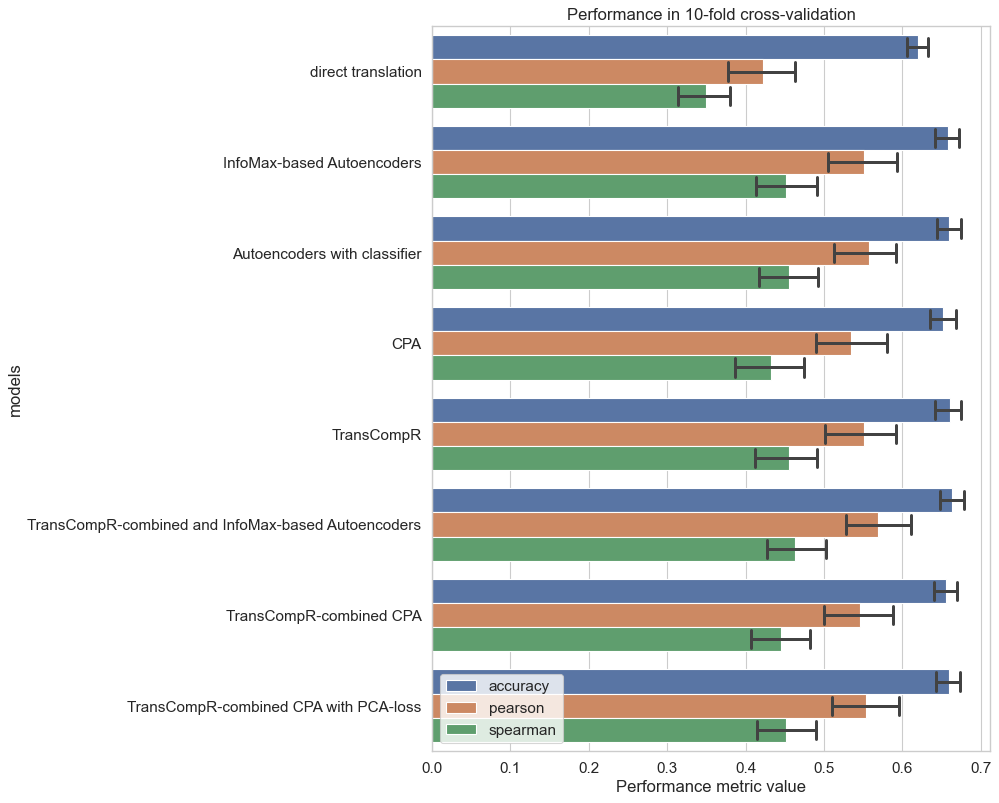

In [7]:
sns.set_theme(style="whitegrid",font_scale = 1.25)
plt.figure(figsize=(9,12), dpi= 80)
sns.barplot(x="value", y="model", data=res_to_a375,
            order=['direct translation','InfoMax-based Autoencoders',
                   'Autoencoders with classifier','CPA',
                   'TransCompR','TransCompR-combined and InfoMax-based Autoencoders',
                   'TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_compare_with_TransCompR_a375.png', bbox_inches='tight',dpi=600)

In [10]:
from scipy import stats

In [11]:
models = ['direct translation','InfoMax-based Autoencoders','Autoencoders with classifier','CPA',
          'TransCompR','TransCompR-combined and InfoMax-based Autoencoders',
          'TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-11-e7d3c842d818>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-11-e7d3c842d818>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [12]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-12-2bb75a293747>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='spearman'].value.values
<ipython-input-12-2bb75a293747>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='spearman'].value.values


In [13]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='accuracy'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-13-748d6dd7cfa5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='accuracy'].value.values
<ipython-input-13-748d6dd7cfa5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='accuracy'].value.values


In [14]:
a375_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_translate = a375_translate[['metric','direct translation','InfoMax-based Autoencoders','Autoencoders with classifier','CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders','TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']]
a375_translate.to_csv('../results/MI_results/allgenes_a375_compare_with_TransCompR_translation_pvalues_table.csv')
a375_translate

,metric,direct translation,InfoMax-based Autoencoders,Autoencoders with classifier,CPA,TransCompR,TransCompR-combined and InfoMax-based Autoencoders,TransCompR-combined CPA,TransCompR-combined CPA with PCA-loss
direct translation,pearson,1.0,0.005795,0.002202,0.007285,0.005795,0.001315,0.007285,0.003611
InfoMax-based Autoencoders,pearson,0.0,1.000000,0.909722,0.384673,0.969850,0.570750,0.791337,0.969850
Autoencoders with classifier,pearson,0.0,0.000000,1.000000,0.344704,0.969850,0.520523,0.677585,0.850107
CPA,pearson,0.0,0.000000,0.000000,1.000000,0.384673,0.273036,0.623176,0.344704
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.472676,0.791337,0.969850
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.472676,0.472676
TransCompR-combined CPA,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.623176
TransCompR-combined CPA with PCA-loss,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
direct translation,spearman,1.0,0.002827,0.002202,0.007285,0.002202,0.001706,0.002202,0.005795
InfoMax-based Autoencoders,spearman,0.0,1.000000,0.791337,0.384673,0.850107,0.623176,0.850107,0.969850


### Same but for reconstruction

In [15]:
res_recon_a375 = results.loc[:,['recon_pear_a375','recon_spear_a375','recon_acc_a375','model']]
res_recon_a375.columns = ['pearson','spearman','accuracy','model']
res_recon_a375

,pearson,spearman,accuracy,model
0,0.818401,0.754474,0.789528,CPA
1,0.827302,0.753359,0.787998,CPA
2,0.832906,0.766292,0.793680,CPA
3,0.807958,0.729672,0.776977,CPA
4,0.828193,0.761095,0.795430,CPA
...,...,...,...,...
5,0.852931,0.821069,0.825106,TransCompR-combined CPA with PCA-loss
6,0.854302,0.819990,0.822211,TransCompR-combined CPA with PCA-loss
7,0.852009,0.824811,0.827223,TransCompR-combined CPA with PCA-loss
8,0.851762,0.820850,0.823709,TransCompR-combined CPA with PCA-loss


In [16]:
res_recon_a375 = pd.melt(res_recon_a375,id_vars=['model'])
res_recon_a375.columns = ['model','metric','value']
res_recon_a375

,model,metric,value
0,CPA,pearson,0.818401
1,CPA,pearson,0.827302
2,CPA,pearson,0.832906
3,CPA,pearson,0.807958
4,CPA,pearson,0.828193
...,...,...,...
205,TransCompR-combined CPA with PCA-loss,accuracy,0.825106
206,TransCompR-combined CPA with PCA-loss,accuracy,0.822211
207,TransCompR-combined CPA with PCA-loss,accuracy,0.827223
208,TransCompR-combined CPA with PCA-loss,accuracy,0.823709


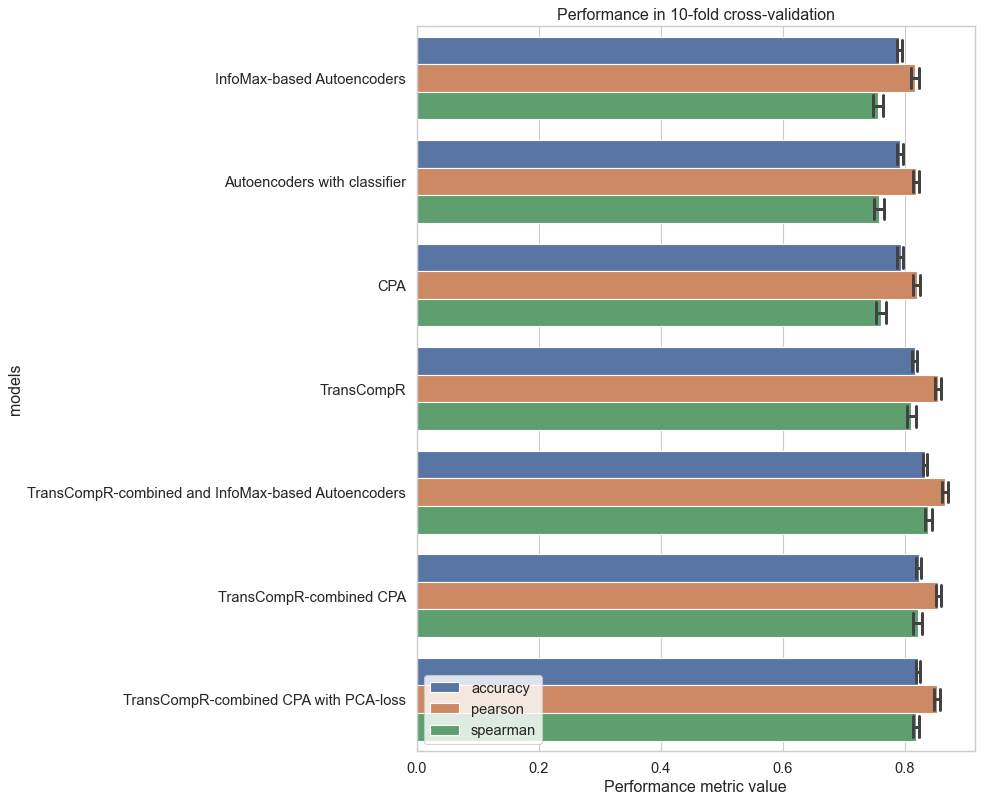

In [19]:
sns.set_theme(style="whitegrid",font_scale = 1.2)
plt.figure(figsize=(9,12), dpi= 80)
sns.barplot(x="value", y="model", data=res_recon_a375,
            order=['InfoMax-based Autoencoders','Autoencoders with classifier',
                   'CPA','TransCompR',
                   'TransCompR-combined and InfoMax-based Autoencoders',
                   'TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_reconstruction_compare_with_TransCompR_a375.png', bbox_inches='tight',dpi=600)

In [20]:
models = ['InfoMax-based Autoencoders','Autoencoders with classifier','CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders','TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
        x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-20-9c388c650ab4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_a375[res_to_a375['model']==m1][res_to_a375['metric']=='pearson'].value.values
<ipython-input-20-9c388c650ab4>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_a375[res_to_a375['model']==m2][res_to_a375['metric']=='pearson'].value.values


In [21]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-21-db2d8645d6f5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='spearman'].value.values
<ipython-input-21-db2d8645d6f5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='spearman'].value.values


In [22]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='accuracy'].value.values
        x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-22-7bf8ce6c3d50>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_a375[res_recon_a375['model']==m1][res_recon_a375['metric']=='accuracy'].value.values
<ipython-input-22-7bf8ce6c3d50>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_a375[res_recon_a375['model']==m2][res_recon_a375['metric']=='accuracy'].value.values


In [23]:
a375_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
a375_reconstruction = a375_reconstruction[['metric','InfoMax-based Autoencoders','Autoencoders with classifier','CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders','TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']]
a375_reconstruction.to_csv('../results/MI_results/allgenes_a375_compare_with_TransCompR_reconstruction_pvalues_table.csv')
a375_reconstruction

,metric,InfoMax-based Autoencoders,Autoencoders with classifier,CPA,TransCompR,TransCompR-combined and InfoMax-based Autoencoders,TransCompR-combined CPA,TransCompR-combined CPA with PCA-loss
InfoMax-based Autoencoders,pearson,1.0,0.909722,0.384673,0.969850,0.570750,0.791337,0.969850
Autoencoders with classifier,pearson,0.0,1.000000,0.344704,0.969850,0.520523,0.677585,0.850107
CPA,pearson,0.0,0.000000,1.000000,0.384673,0.273036,0.623176,0.344704
TransCompR,pearson,0.0,0.000000,0.000000,1.000000,0.472676,0.791337,0.969850
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.472676,0.472676
TransCompR-combined CPA,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.623176
TransCompR-combined CPA with PCA-loss,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
InfoMax-based Autoencoders,spearman,1.0,0.472676,0.427355,0.000183,0.000183,0.000183,0.000183
Autoencoders with classifier,spearman,0.0,1.000000,0.733730,0.000183,0.000183,0.000183,0.000183
CPA,spearman,0.0,0.000000,1.000000,0.000183,0.000183,0.000183,0.000183


## HT29 trasnlation

In [24]:
res_to_ht29 = results.loc[:,['model_pearsonHT29','model_spearHT29','model_accHT29','model']]
res_to_ht29.columns = ['pearson','spearman','accuracy','model']
res_baseline = baseline.loc[:,['Direct_pearson','Direct_spearman','DirectAcc_ht29']]
res_baseline['model'] = 'direct translation'
res_baseline.columns = ['pearson','spearman','accuracy','model']
res_to_ht29 = pd.concat([res_to_ht29,res_baseline],axis=0)
res_to_ht29

,pearson,spearman,accuracy,model
0,0.673932,0.562946,0.701321,CPA
1,0.589004,0.479765,0.668531,CPA
2,0.676635,0.570473,0.702578,CPA
3,0.550606,0.439052,0.653401,CPA
4,0.621177,0.519464,0.685294,CPA
...,...,...,...,...
5,0.414236,0.365071,0.626368,direct translation
6,0.305874,0.271386,0.590569,direct translation
7,0.453185,0.369136,0.629967,direct translation
8,0.301552,0.254713,0.581735,direct translation


In [25]:
res_to_ht29 = pd.melt(res_to_ht29,id_vars=['model'])
res_to_ht29.columns = ['model','metric','value']
res_to_ht29

,model,metric,value
0,CPA,pearson,0.673932
1,CPA,pearson,0.589004
2,CPA,pearson,0.676635
3,CPA,pearson,0.550606
4,CPA,pearson,0.621177
...,...,...,...
235,direct translation,accuracy,0.626368
236,direct translation,accuracy,0.590569
237,direct translation,accuracy,0.629967
238,direct translation,accuracy,0.581735


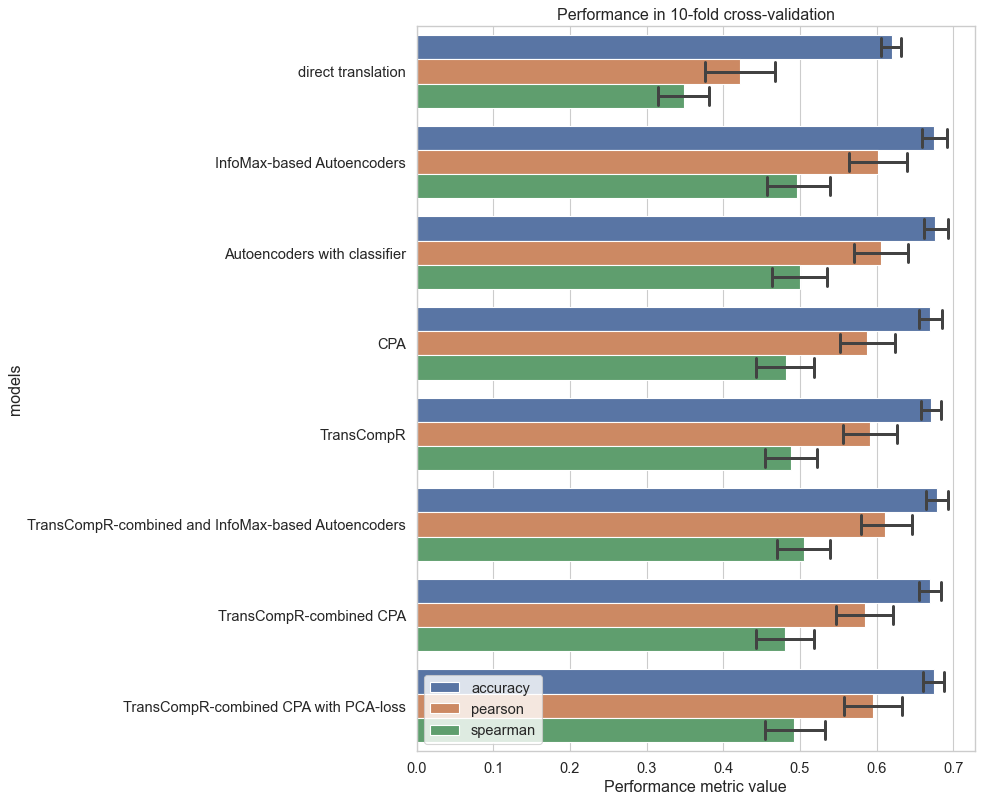

In [26]:
sns.set_theme(style="whitegrid",font_scale = 1.2)
plt.figure(figsize=(9,12), dpi= 80)
sns.barplot(x="value", y="model", data=res_to_ht29,
            order=['direct translation','InfoMax-based Autoencoders','Autoencoders with classifier','CPA',
                   'TransCompR','TransCompR-combined and InfoMax-based Autoencoders',
                   'TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_compare_with_TransCompR_ht29.png', bbox_inches='tight',dpi=600)

In [27]:
models = ['direct translation','InfoMax-based Autoencoders','Autoencoders with classifier','CPA',
          'TransCompR','TransCompR-combined and InfoMax-based Autoencoders',
          'TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-27-6c59c65a3b00>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='pearson'].value.values
<ipython-input-27-6c59c65a3b00>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='pearson'].value.values


In [28]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-28-2b2bd44095e3>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='spearman'].value.values
<ipython-input-28-2b2bd44095e3>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='spearman'].value.values


In [29]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='accuracy'].value.values
        x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-29-c5c1bf237c12>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_to_ht29[res_to_ht29['model']==m1][res_to_ht29['metric']=='accuracy'].value.values
<ipython-input-29-c5c1bf237c12>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_to_ht29[res_to_ht29['model']==m2][res_to_ht29['metric']=='accuracy'].value.values


In [30]:
ht29_translate = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_translate = ht29_translate[['metric','direct translation','InfoMax-based Autoencoders','Autoencoders with classifier','CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders','TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']]
ht29_translate.to_csv('../results/MI_results/allgenes_ht29_compare_with_TransCompR_translation_pvalues_table.csv')
ht29_translate

,metric,direct translation,InfoMax-based Autoencoders,Autoencoders with classifier,CPA,TransCompR,TransCompR-combined and InfoMax-based Autoencoders,TransCompR-combined CPA,TransCompR-combined CPA with PCA-loss
direct translation,pearson,1.0,0.000330,0.000330,0.000440,0.000330,0.000330,0.000440,0.000440
InfoMax-based Autoencoders,pearson,0.0,1.000000,0.909722,0.677585,0.733730,0.733730,0.791337,0.969850
Autoencoders with classifier,pearson,0.0,0.000000,1.000000,0.520523,0.623176,0.850107,0.570750,0.791337
CPA,pearson,0.0,0.000000,0.000000,1.000000,0.969850,0.427355,0.909722,0.850107
TransCompR,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.472676,0.850107,0.733730
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.344704,0.472676
TransCompR-combined CPA,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.733730
TransCompR-combined CPA with PCA-loss,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
direct translation,spearman,1.0,0.000330,0.000330,0.000769,0.000330,0.000330,0.000583,0.000769
InfoMax-based Autoencoders,spearman,0.0,1.000000,0.733730,0.677585,0.791337,0.677585,0.623176,0.969850


### Same but for reconstruction

In [31]:
res_recon_ht29 = results.loc[:,['recon_pear_ht29','recon_spear_ht29','recon_acc_ht29','model']]
res_recon_ht29.columns = ['pearson','spearman','accuracy','model']
res_recon_ht29

,pearson,spearman,accuracy,model
0,0.835393,0.783634,0.801952,CPA
1,0.821832,0.772010,0.796822,CPA
2,0.819998,0.770136,0.797072,CPA
3,0.831658,0.772910,0.799429,CPA
4,0.849340,0.809962,0.821331,CPA
...,...,...,...,...
5,0.862591,0.845784,0.837408,TransCompR-combined CPA with PCA-loss
6,0.859452,0.833553,0.831321,TransCompR-combined CPA with PCA-loss
7,0.872393,0.846407,0.839787,TransCompR-combined CPA with PCA-loss
8,0.865892,0.846262,0.839424,TransCompR-combined CPA with PCA-loss


In [32]:
res_recon_ht29 = pd.melt(res_recon_ht29,id_vars=['model'])
res_recon_ht29.columns = ['model','metric','value']
res_recon_ht29

,model,metric,value
0,CPA,pearson,0.835393
1,CPA,pearson,0.821832
2,CPA,pearson,0.819998
3,CPA,pearson,0.831658
4,CPA,pearson,0.849340
...,...,...,...
205,TransCompR-combined CPA with PCA-loss,accuracy,0.837408
206,TransCompR-combined CPA with PCA-loss,accuracy,0.831321
207,TransCompR-combined CPA with PCA-loss,accuracy,0.839787
208,TransCompR-combined CPA with PCA-loss,accuracy,0.839424


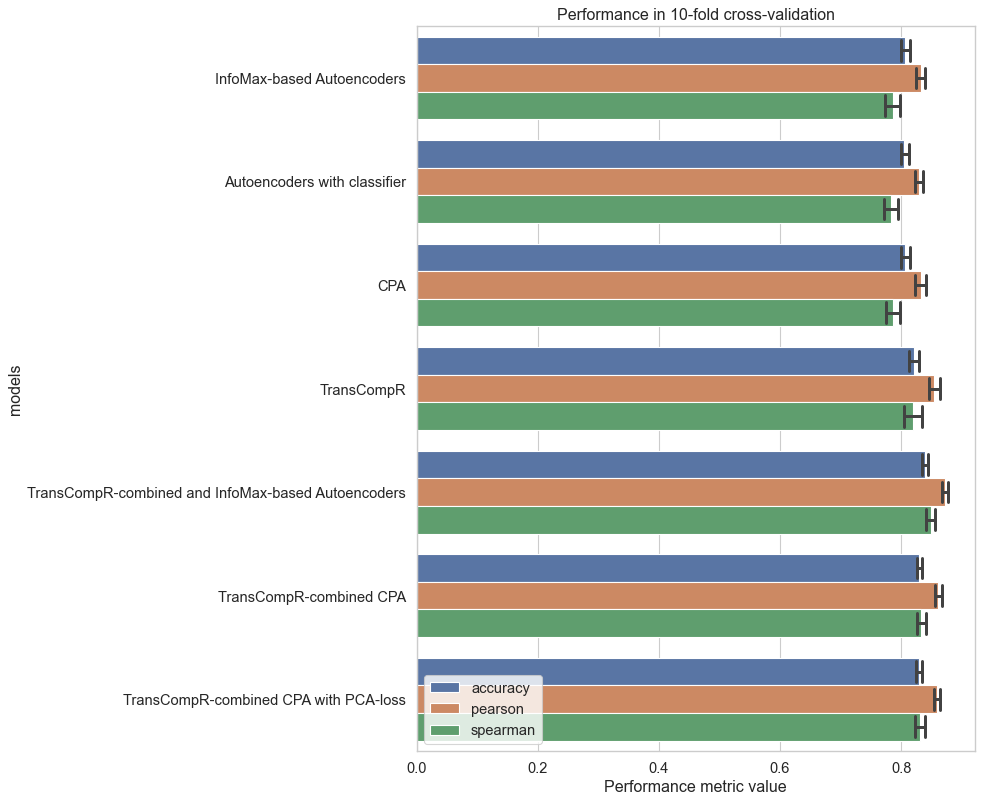

In [34]:
sns.set_theme(style="whitegrid",font_scale = 1.2)
plt.figure(figsize=(9,12), dpi= 80)
sns.barplot(x="value", y="model", data=res_recon_ht29,
            order=['InfoMax-based Autoencoders','Autoencoders with classifier',
                   'CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders','TransCompR-combined CPA',
                   'TransCompR-combined CPA with PCA-loss'],
            hue_order = ['accuracy','pearson','spearman'],
            hue="metric",ci=95,capsize=0.2,orient='h')
plt.legend(loc='lower left')
plt.gca().set(title='Performance in 10-fold cross-validation', 
              xlabel = 'Performance metric value',
              ylabel='models')
#plt.xticks(rotation=45)
#plt.ylim(0,1.0)
plt.savefig('../figures/MI_results/allgenes_reconstruction_compare_with_TransCompR_ht29.png', bbox_inches='tight',dpi=600)

In [35]:
models = ['InfoMax-based Autoencoders','Autoencoders with classifier',
          'CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders',
          'TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']
pvalues_pearson = np.zeros((len(models),len(models)))
pvalues_pearson = pd.DataFrame(pvalues_pearson)
pvalues_pearson.index = models
pvalues_pearson.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values
        pvalues_pearson.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_pearson['metric'] = 'pearson'

<ipython-input-35-1711be84a165>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='pearson'].value.values
<ipython-input-35-1711be84a165>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='pearson'].value.values


In [36]:
pvalues_spearman = np.zeros((len(models),len(models)))
pvalues_spearman = pd.DataFrame(pvalues_spearman)
pvalues_spearman.index = models
pvalues_spearman.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values
        pvalues_spearman.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_spearman['metric'] = 'spearman'

<ipython-input-36-d8298965d0b4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='spearman'].value.values
<ipython-input-36-d8298965d0b4>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='spearman'].value.values


In [37]:
pvalues_accuracy = np.zeros((len(models),len(models)))
pvalues_accuracy = pd.DataFrame(pvalues_accuracy)
pvalues_accuracy.index = models
pvalues_accuracy.columns = models
for i in range(len(models)):
    for j in range(i,len(models)):
        m1 = models[i]
        m2 = models[j]
        x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='accuracy'].value.values
        x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='accuracy'].value.values
        pvalues_accuracy.loc[m1,m2] = stats.mannwhitneyu(x1,x2)[1]
pvalues_accuracy['metric'] = 'accuracy'

<ipython-input-37-12b8fd9ef33b>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x1 = res_recon_ht29[res_recon_ht29['model']==m1][res_recon_ht29['metric']=='accuracy'].value.values
<ipython-input-37-12b8fd9ef33b>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x2 = res_recon_ht29[res_recon_ht29['model']==m2][res_recon_ht29['metric']=='accuracy'].value.values


In [38]:
ht29_reconstruction = pd.concat([pvalues_pearson,pvalues_spearman,pvalues_accuracy],axis=0)
ht29_reconstruction = ht29_reconstruction[['metric','InfoMax-based Autoencoders','Autoencoders with classifier','CPA','TransCompR','TransCompR-combined and InfoMax-based Autoencoders','TransCompR-combined CPA','TransCompR-combined CPA with PCA-loss']]
ht29_reconstruction.to_csv('../results/MI_results/allgenes_ht29_compare_with_TransCompR_reconstruction_pvalues_table.csv')
ht29_reconstruction

,metric,InfoMax-based Autoencoders,Autoencoders with classifier,CPA,TransCompR,TransCompR-combined and InfoMax-based Autoencoders,TransCompR-combined CPA,TransCompR-combined CPA with PCA-loss
InfoMax-based Autoencoders,pearson,1.0,0.623176,0.909722,0.005795,0.000183,0.000330,0.000440
Autoencoders with classifier,pearson,0.0,1.000000,0.850107,0.001315,0.000183,0.000440,0.000330
CPA,pearson,0.0,0.000000,1.000000,0.005795,0.000183,0.000769,0.000583
TransCompR,pearson,0.0,0.000000,0.000000,1.000000,0.005795,0.344704,0.472676
TransCompR-combined and InfoMax-based Autoencoders,pearson,0.0,0.000000,0.000000,0.000000,1.000000,0.009108,0.003611
TransCompR-combined CPA,pearson,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.850107
TransCompR-combined CPA with PCA-loss,pearson,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
InfoMax-based Autoencoders,spearman,1.0,0.733730,0.791337,0.011330,0.000183,0.000183,0.000330
Autoencoders with classifier,spearman,0.0,1.000000,0.791337,0.007285,0.000183,0.000183,0.000330
CPA,spearman,0.0,0.000000,1.000000,0.004586,0.000183,0.000246,0.000330
